In [1]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot
warnings.filterwarnings('ignore')


### 1. Reading merged Csv file downloaded from google trends on similar words related to dengue fetched from NEA website

Source for common terms: https://www.moh.gov.sg/diseases-updates/dengue
1. General terms - Dengue cluster, dengue hotspots
2. Disease Definition - Dengue, Dengue Fever, Fever, DHF, haemorrhagic
3. Dengue Symptom -  Rashes, fever, joint pain, nausea, vomit, bleeding, abdominal pain, headache,
4. Dengue Protection - dengue vaccine, Dengvaxia, citronella, eucalyptus, repellent, mosquito net, essential oils, stagnant water, DEET, picaridin, IR3535, wolbachia, insecticide
5. Dengue Treatment - electrolyte replacement, blood transfusion, emergency treatment, mopiko
6. Dengue Vector - Aedes mosquito, mosquito bite, Aedes aegypti

In [2]:
df = pd.read_csv('../datasets/dengue_search_trends/merged_search_trends.csv')
df.head(3)

,Week,abdominal pain: (Singapore),aedes: (Singapore),Aedes aegypti: (Singapore),Aedes mosquito: (Singapore),bleeding: (Singapore),blood transfusion: (Singapore),citronella: (Singapore),DEET: (Singapore),dengue: (Singapore),...,mosquito bite: (Singapore),mosquito net: (Singapore),mosquito repellent: (Singapore),nausea: (Singapore),picaridin: (Singapore),Rashes: (Singapore),repellent: (Singapore),stagnant water: (Singapore),vomit: (Singapore),wolbachia: (Singapore)
0,2018-04-08,34,0,0,0,63,0,0,0,9,...,43,38,47,43,0,60,38,31,31,0
1,2018-04-15,66,59,0,0,54,36,0,24,5,...,30,55,0,55,0,63,17,0,59,0
2,2018-04-22,51,0,0,22,86,0,37,0,8,...,39,0,20,49,34,77,42,0,39,0


### 2. Finding correlation coefficients of the keywords

In [3]:
dataCorr = df.corr(method='pearson').abs()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))
print (dataCorr)

                                 abdominal pain: (Singapore)  \
abdominal pain: (Singapore)                              NaN   
aedes: (Singapore)                                       NaN   
Aedes aegypti: (Singapore)                               NaN   
Aedes mosquito: (Singapore)                              NaN   
bleeding: (Singapore)                                    NaN   
blood transfusion: (Singapore)                           NaN   
citronella: (Singapore)                                  NaN   
DEET: (Singapore)                                        NaN   
dengue: (Singapore)                                      NaN   
Dengue cluster: (Singapore)                              NaN   
dengue fever: (Singapore)                                NaN   
dengue hotspots: (Singapore)                             NaN   
dengue vaccine: (Singapore)                              NaN   
Dengvaxia: (Singapore)                                   NaN   
dhf: (Singapore)                        

### 3. Selecting keywords that are highly correlated with each other. The threshold is 0.5.

In [4]:
dataCorr = dataCorr[abs(dataCorr) >= 0.5].stack().reset_index()
print (dataCorr)

                            level_0                          level_1         0
0                aedes: (Singapore)              dengue: (Singapore)  0.567831
1                aedes: (Singapore)      Dengue cluster: (Singapore)  0.502240
2                aedes: (Singapore)            mosquito: (Singapore)  0.605183
3               dengue: (Singapore)      Dengue cluster: (Singapore)  0.877742
4               dengue: (Singapore)        dengue fever: (Singapore)  0.835288
5               dengue: (Singapore)            mosquito: (Singapore)  0.801544
6               dengue: (Singapore)  mosquito repellent: (Singapore)  0.645571
7               dengue: (Singapore)           repellent: (Singapore)  0.643017
8       Dengue cluster: (Singapore)        dengue fever: (Singapore)  0.745105
9       Dengue cluster: (Singapore)            mosquito: (Singapore)  0.687726
10      Dengue cluster: (Singapore)  mosquito repellent: (Singapore)  0.550513
11      Dengue cluster: (Singapore)           repell

### 4. Get the unique list of keywords and prune the dataframe

In [5]:
columns= list(set(list(set(dataCorr.level_0))+list(set(dataCorr.level_1))))
columns

['repellent: (Singapore)',
 'dengue fever: (Singapore)',
 'Dengue cluster: (Singapore)',
 'mosquito: (Singapore)',
 'mosquito repellent: (Singapore)',
 'dengue: (Singapore)',
 'aedes: (Singapore)']

In [6]:
df2 = df[['Week']+columns]
df2.head(3)

,Week,repellent: (Singapore),dengue fever: (Singapore),Dengue cluster: (Singapore),mosquito: (Singapore),mosquito repellent: (Singapore),dengue: (Singapore),aedes: (Singapore)
0,2018-04-08,38,20,0,40,47,9,0
1,2018-04-15,17,0,0,32,0,5,59
2,2018-04-22,42,12,11,37,20,8,0


### 5. Plotting the trend of top 7 correlated keywords from 2018 to 2023 weekly


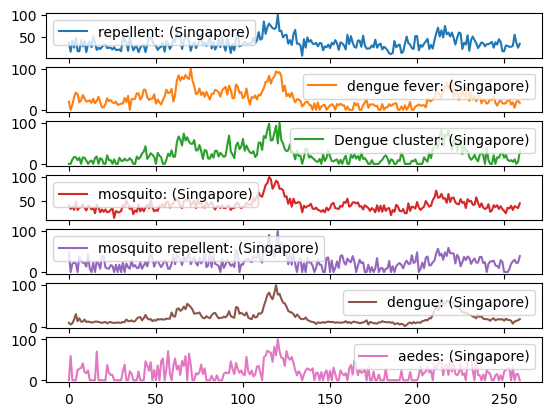

In [7]:
df2.plot(subplots=True, legend=True)
pyplot.show()